In [70]:
import numpy as np
import matplotlib.pyplot as plt

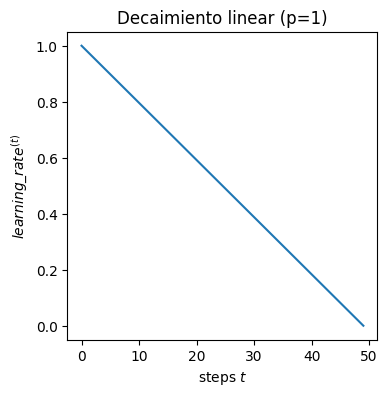

In [71]:
# Parámetros
step = np.arange(0, 50)
max_iter = step[-1]  # 49

p = 1.0
asymp_lr = p * (1-(step / max_iter))

# Gráfica única
plt.figure(figsize=(4, 4))
plt.plot(step, asymp_lr)
plt.title('Decaimiento linear (p=1)')
plt.xlabel('steps $t$')
plt.ylabel('$learning\\_rate^{(t)}$')
plt.show()

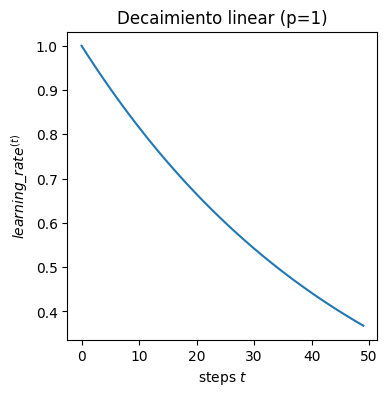

In [72]:
# Parámetros
step = np.arange(0, 50)
max_iter = step[-1]  # 49
# Decaimiento eponencialo (p = 1)
p = 1.0
tau=max_iter/5
y=1
lr = p * np.exp(-step *y/max_iter)
# Gráfica única
plt.figure(figsize=(4, 4))
plt.plot(step, lr)
plt.title('Decaimiento linear (p=1)')
plt.xlabel('steps $t$')
plt.ylabel('$learning\\_rate^{(t)}$')
plt.show()

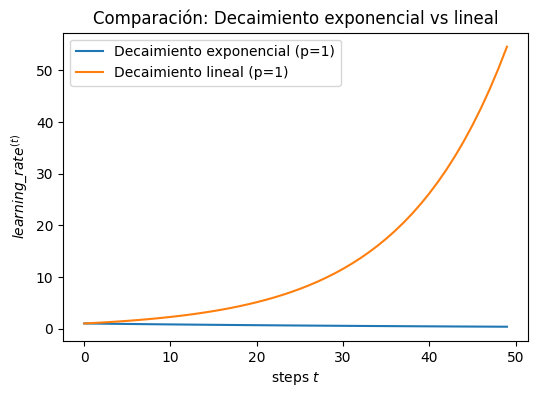

In [84]:

# Parámetros
steps = np.arange(0, 50)
max_iter = steps[-1]  # 4999

# Decaimiento exponencial (p = 1)
p = 1.0
exp_lr = p * np.exp(-steps / max_iter)
y=-4
# Decaimiento lineal hasta cero
linear_lr = p * np.exp(-step *(y/max_iter))
linear_lr = np.clip(linear_lr, a_min=0, a_max=None)

# Graficar ambos
plt.figure(figsize=(6, 4))
plt.plot(steps, exp_lr, label='Decaimiento exponencial (p=1)')
plt.plot(steps, linear_lr, label='Decaimiento lineal (p=1)')
plt.title('Comparación: Decaimiento exponencial vs lineal')
plt.xlabel('steps $t$')
plt.ylabel('$learning\\_rate^{(t)}$')
plt.legend()

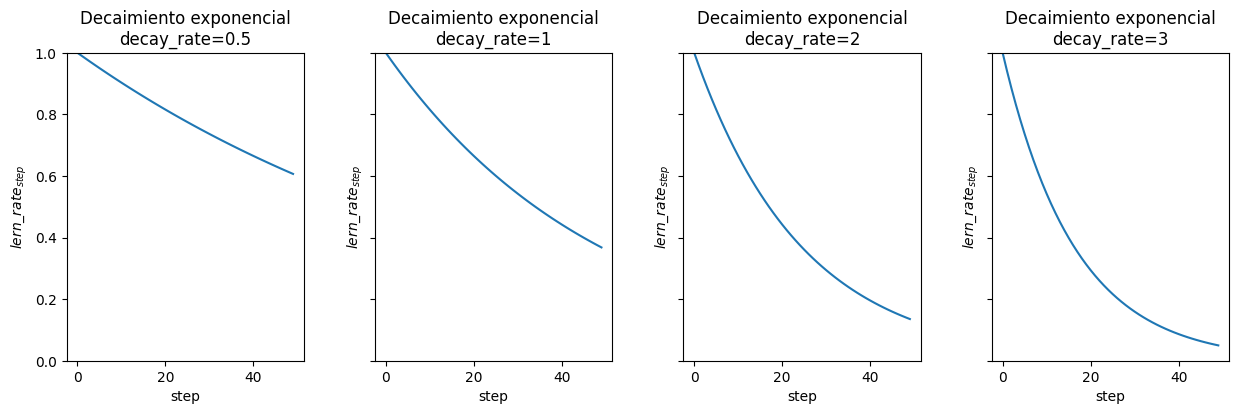

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
epochs = np.arange(0, 50)
max_iter = epochs[-1]  # 49 o 50, según prefieras
initial_taus = [0.5, 1, 2, 3]
p = 1.0

# Creamos los 4 subplots con sharey=True para un eje Y común
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

for ax, decay_rate in zip(axes, initial_taus):
    # Decaimiento exponencial con constante de tiempo tau
    exp_lr = p * np.exp(-step *(decay_rate/max_iter))
    ax.plot(epochs, exp_lr)
    ax.set_title(f'Decaimiento exponencial\ndecay_rate={decay_rate}')
    ax.set_xlabel('step')
    ax.set_ylabel('$lern\_rate_{step}$')

# Ajustamos límites Y en [0, 1]
axes[0].set_ylim(0, 1)

fig.subplots_adjust(wspace=0.3)
plt.savefig('img/decay_rate.png', dpi=300)
plt.show()
        # Valor escalable para la dscomposición exponencial


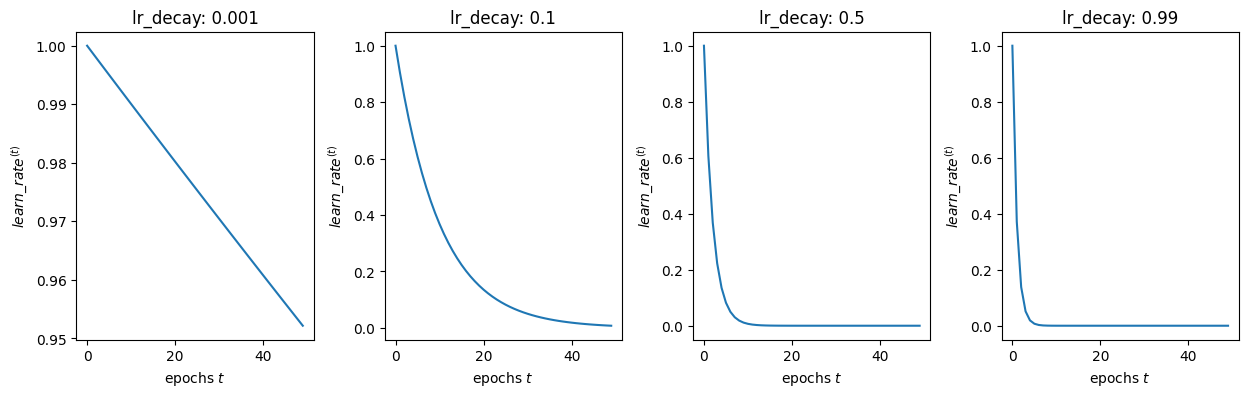

In [87]:
# Decaimiento exponencial

epochs = np.arange(0, 50)
max_iter = epochs[-1]  # 49
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate)
    plt.title('lr_decay: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$learn\_rate^{(t)}$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig('img/lr_decay.png', dpi=300)
plt.show()

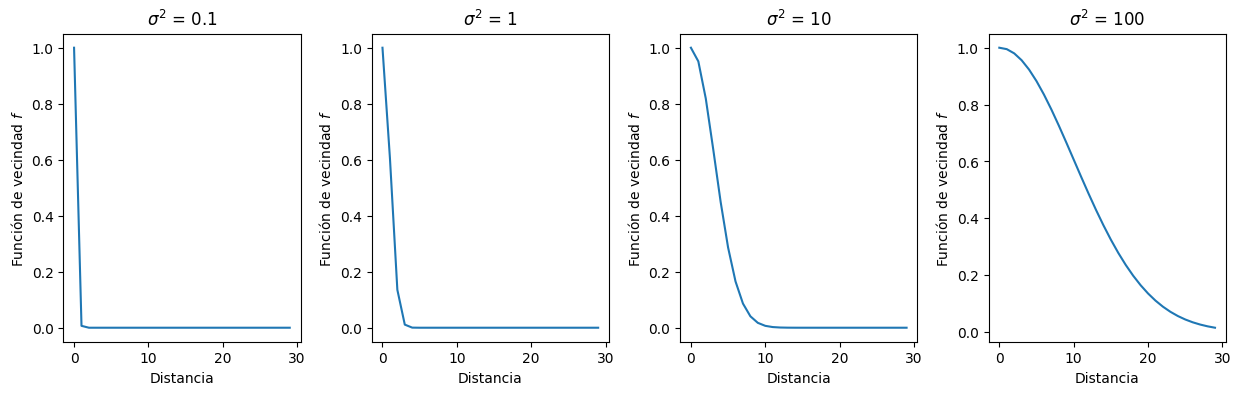

In [88]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance**2 / (2 * s))
    plt.plot(distance, f)
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distancia')
    plt.ylabel('Función de vecindad $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig('img/radius_decay.png', dpi=300)
plt.show()


In [47]:
from somJ.som  import SoM
from sklearn.preprocessing import MinMaxScaler

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Number of training examples
n_x = 300000
# Initialize the training data
rand = np.random.RandomState(0)
train_data = rand.randint(0, 255, (n_x, 3))

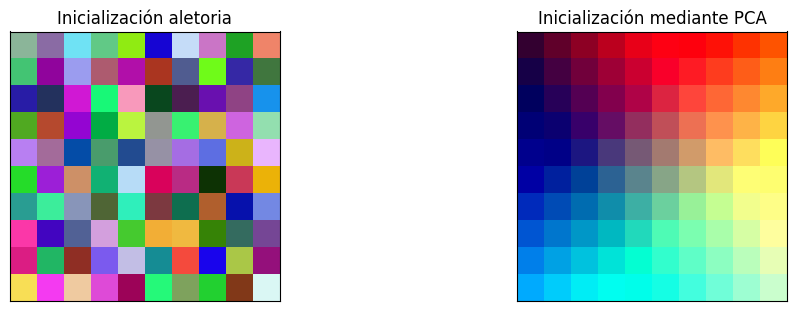

In [ ]:

# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
som = SoM(method="random",data=train_data)
ax[0].imshow(som.re_scale().astype(int))
ax[0].title.set_text('Inicialización aletoria')
som = SoM(method="pca",data=train_data)
ax[1].imshow(som.re_scale().astype(int))
ax[1].title.set_text('Inicialización mediante PCA')
plt.savefig("img/inicializacion.png",dpi=300)


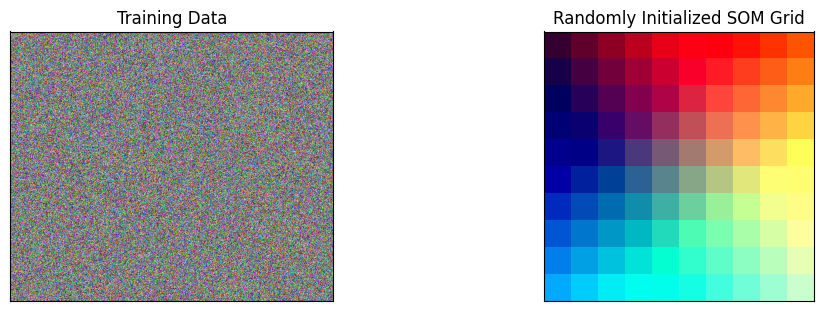

In [ ]:
som = SoM(method="pca",data=train_data)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(500, 600, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(som.re_scale().astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

### Usanco Online Learning

Entrenando SOM: 100%|██████████████████████| 10/10 [01:30<00:00,  9.01s/it, lr=0.0407, radius=0.638]


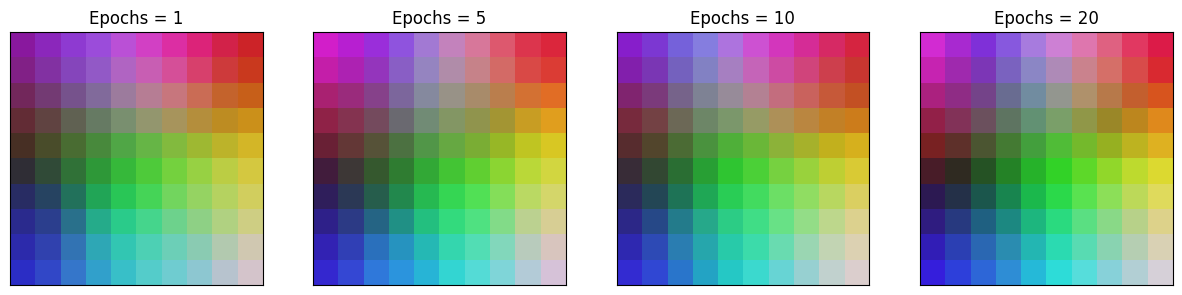

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    som.train(train_data, epochs=epochs,prog_bar=True)
    map =som.re_scale() # devolver el mapa a [0,255]
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

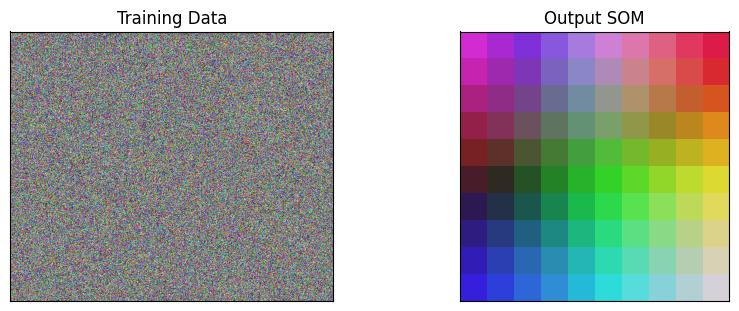

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(10, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(500, 600, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(som.re_scale().astype(int))
ax[1].title.set_text('Output SOM')
plt.savefig('img/colores_visualización.png', dpi=300)

### Usando BATCHMAP

In [ ]:
# Initialize the SOM randomly
som = SoM(method="pca",data=train_data)

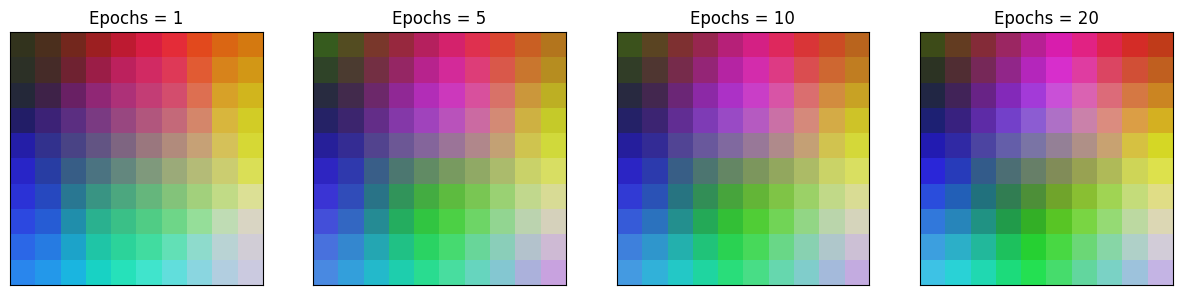

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    som.train(train_data, epochs=epochs,update='batchmap',batch_size=10000)
    map =som.re_scale()
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

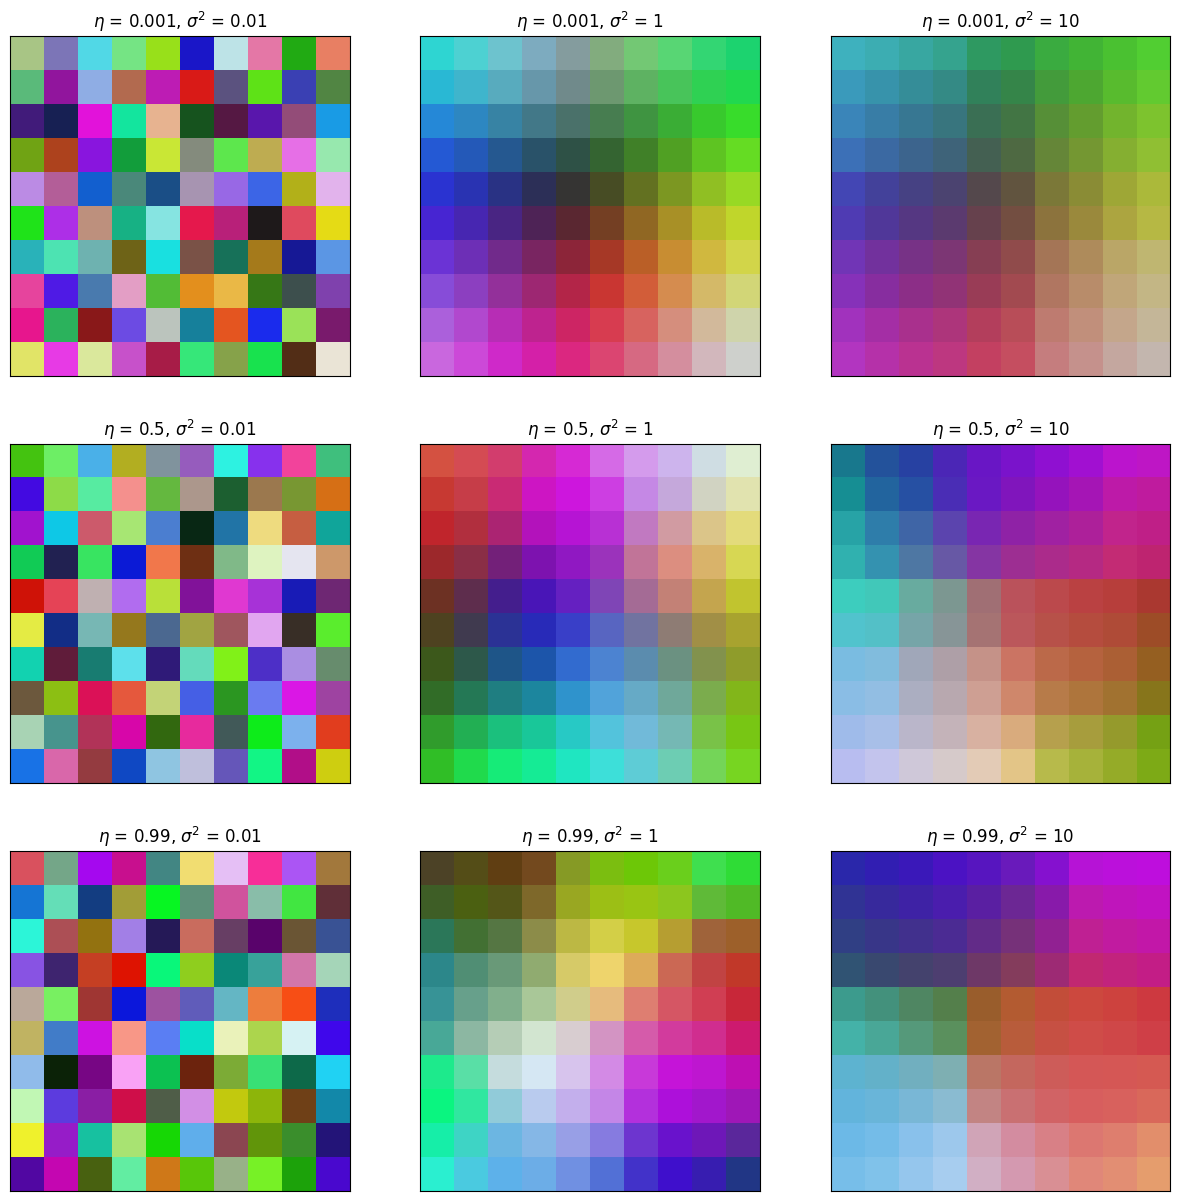

In [ ]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        som = SoM(method="random",data=train_data)
        som.train(train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        map =som.re_scale()
        ax[i][j].imshow(map.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))